### 다항 분류: 출력값이 softmax 함수로 인해 여러 개의 확률값으로 출력. 이 때 확률값이 가장 큰 인덱스를 분류의 결과로 얻음

In [4]:
import numpy as np

# def softmaxFunc(a):
#     c = np.max(a)   # 오버플로우 방지용
#     exp_a = np.exp(a - c)
#     sum_exp_a = np.sum(exp_a)
#     y = exp_a / sum_exp_a
#     return y

# a = np.array([1.0, 1.0, 1.5])
# result = softmaxFunc(a)
# print(result)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical   # one-hot encoding 지원
import matplotlib.pyplot as plt

np.random.seed()
# data  준비
xdata = np.random.random((1000, 12))    # 시험점수라고 가정
ydata = np.random.randint(5, size=(1000, 1))
print(xdata[:5])    # feature
print(ydata[:2])    # label     정수를 다섯가지 형태로 출력될 수 있도록 모양 변경 - one-hot 처리
ydata = to_categorical(ydata, num_classes=5)
print(ydata[:2])
# print([int(np.argmax(i)) for i in ydata[:2]])      # 원핫인코딩 값을 원복


[[0.36570827 0.29001401 0.69389022 0.16075755 0.61304787 0.48025012
  0.79182592 0.34323866 0.45209223 0.54141596 0.73718337 0.70103816]
 [0.12715292 0.93907253 0.72142495 0.31920976 0.26946599 0.8179939
  0.7059119  0.66298942 0.2889532  0.46800312 0.72098682 0.75138376]
 [0.43658875 0.65569741 0.60877477 0.50223588 0.23493453 0.22936186
  0.23847725 0.80378807 0.77613881 0.03063954 0.80719669 0.07161869]
 [0.46664175 0.27673585 0.3604235  0.80423263 0.79285032 0.89259693
  0.355608   0.22224596 0.26092037 0.19490474 0.47320727 0.26912097]
 [0.09736608 0.36469889 0.69618383 0.94533322 0.63955606 0.16027177
  0.83388954 0.84271631 0.17027077 0.17416898 0.13338076 0.26237321]]
[[4]
 [1]]
[[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]]


In [11]:
# model
from matplotlib import units
from streamlit import metric


model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=5, activation='softmax'))
print(model.summary())

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print('learning rate: ', model.optimizer.learning_rate.numpy())

history = model.fit(xdata, ydata, epochs=1000, batch_size=32, verbose=0)

model_eval = model.evaluate(xdata, ydata)
print('모델 평가 결과: ', model_eval)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,029 (4.02 KB)

 Trainable params: 1,029 (4.02 KB)

 Non-trainable params: 0 (0.00 B)

None
learning rate:  0.001
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6010 - loss: 0.9763 
모델 평가 결과:  [0.9762637615203857, 0.6010000109672546]


## 시각화

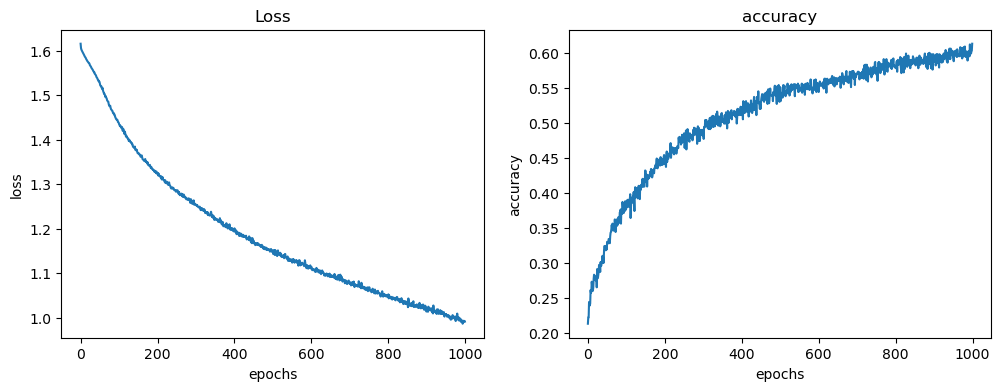

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 4))

ax1.plot(history.history['loss'])
ax1.set_title('Loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')

ax2.plot(history.history['accuracy'])
ax2.set_title('accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
plt.show()

## 분류 예측 결과 보기

In [29]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=5)
print('예측값: ', model.predict(xdata[:5]))
print('예측값: ', np.argmax(model.predict(xdata[:5]), axis=1)) 
print('실제값: ', ydata[:5])
print('실제값: ', [int(i) for i in np.argmax(ydata[:5], axis=1)])

print()
# 새로운 값으로 예측
x_new = np.random.random([1, 12])
print(x_new)
new_pred = model.predict(x_new)
print('분류 결과: ', new_pred, ', 모두 더하면: ', np.sum(new_pred))
print('분류 결과: ', np.argmax(new_pred))

# 가정: 레이블에 해당하는 과목명 출력
classes = np.array(['국어', '영어', '수학', '과학', '체육'])
print('예측값: ', classes[np.argmax(new_pred, axis=1)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
예측값:  [[0.07462 0.09055 0.14667 0.42917 0.25899]
 [0.01015 0.67346 0.05801 0.17017 0.08821]
 [0.30285 0.46579 0.07536 0.0712  0.0848 ]
 [0.0236  0.56381 0.05672 0.31969 0.03618]
 [0.1143  0.26521 0.09912 0.08802 0.43336]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
예측값:  [3 1 1 1 4]
실제값:  [[0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
실제값:  [4, 1, 0, 1, 4]

[[0.18495 0.81815 0.85045 0.55081 0.71947 0.04434 0.13512 0.72837 0.0423
  0.30928 0.78568 0.49466]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
분류 결과:  [[0.10564 0.69973 0.04227 0.05503 0.09734]] , 모두 더하면:  1.0000001
분류 결과:  1
예측값:  ['영어']
